In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [15]:
df = pd.read_csv('Dataset Twitter Fix - Indonesian Sentiment Twitter Dataset Labeled (1).csv')
df = df[['sentimen', 'Tweet']]
df = df.dropna()
df

,sentimen,Tweet
0,0.0,barusan liat tulisan di belakang truk rela inj...
1,0.0,her itu lho miss kevin sama keven rebutan gimb...
2,0.0,iya rep gatau aku masih kelas 4 sd ehh di block
3,0.0,aku mohon tepatilah janjimu penantiancintaeps19
4,0.0,bukan beria nk kahwin sbb gatal celah kangkang...
...,...,...
12642,6.0,"Jangan dibahas dong, udah paham aja kan di kau..."
12643,6.0,di agama lo nyembah nya siapa sih? masa Tuhan ...
12644,6.0,"Katanya demi kemanusiaan, kemanusiaan milik ma..."
12645,6.0,Orang timur kurang pintar dari orang barat


In [16]:
# Stop Words
stop_words = set(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 'gua', 'gw' 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah', 'lho', 'yuk', 'tdk', 'rb', 'dg', 
                       'guys', 'manteman', 'toh', 'amp', 
                       'dm', 'wi', 'sa', 'lha', 'loh', 'gustiii',
                       'ora', 'bossque', 'egk', 'dsb', 'q', 'ak', 'sy', 'w', 
                        'yg', 'nah', 'nih', 'hufttttt', 'lah', 'aq', 'atw'])

In [17]:
def preprocess_text(review):
    review = re.sub(r"http\S+", "", review)             # menghapus link website
    review = re.sub("\S*\d\S*", "", review).strip()     # proses menghapus nomor
    review = re.sub('[^A-Za-z]+', ' ', review)          # proses menghapus selain huruf
    review = review.translate(str.maketrans("","",string.punctuation)) #menghapus tanda baca
    review = review.lower()                             # proses case folding
    review = [word for word in review.split(" ") if not word in stop_words] # proses stop word
    review = " ".join(review)
    review.strip()
    return review

df['Tweet'] = df['Tweet'].apply(lambda x: preprocess_text(x))

<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:3: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Axioo Pongo\AppData\Local\Temp\ipykernel_17832\4294929657.py:3: SyntaxWarning: invalid escape sequence '\S'
  review = re.sub("\S*\d\S*", "", review).strip()     # proses menghapus nomor


In [18]:
df['Tweet']

0        barusan liat tulisan di belakang truk rela inj...
1        her itu miss kevin sama keven rebutan gimbot w...
2            iya rep gatau aku masih kelas sd ehh di block
3                              aku mohon tepatilah janjimu
4        bukan beria nk kahwin sbb gatal celah kangkang...
                               ...                        
12642    jangan dibahas dong udah paham kan di kaum mer...
12643    di agama lo nyembah siapa masa tuhan lahirnya ...
12644    katanya demi kemanusiaan kemanusiaan milik may...
12645           orang timur kurang pintar dari orang barat
12646    penistaan agama yesus tuhan kok disalib kan di...
Name: Tweet, Length: 12646, dtype: object

In [19]:
# Vectorize 'Text Tweet'
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Tweet'])

In [20]:
# Take 'Sentiment' as y
y = df['sentimen']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [22]:
depth = range(1, 20)
accuracy = []
for i in range(1, 20):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    dt_pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, dt_pred))



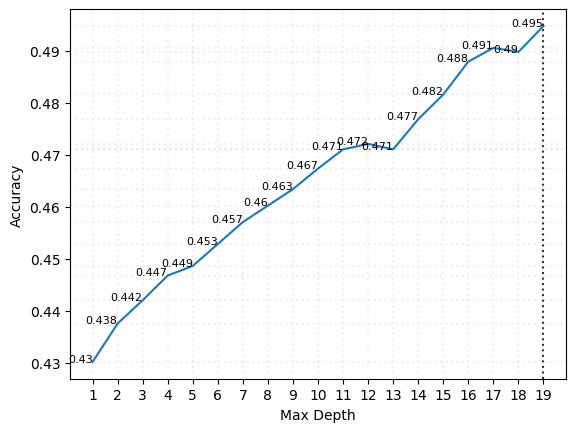

In [23]:
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(depth)
plt.plot(depth, accuracy)

# Find the depth with the highest accuracy
max_accuracy_index = accuracy.index(max(accuracy))

for i in depth:
    # Highlight the line with the highest accuracy
    if i == depth[max_accuracy_index]:
        plt.axvline(x=i, linestyle='dotted', color='black', alpha=0.8)
    else:
        plt.axvline(x=i, linestyle='dotted', color='grey', alpha=0.1)

for i in accuracy:
    plt.axhline(y=i, linestyle='dotted', color='grey', alpha=0.1)

for i in range(len(depth)):
    plt.text(depth[i], accuracy[i], str(round(accuracy[i], 3)), fontsize=8, ha='right')

plt.show()